# Data Science Eng Methods and Tools

### Assignment 1 - ML Data Cleaning and Feature Selection

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

### Dataset



1.   Dataset contains 13 independent columns: CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary
2.   Dependent column: Exited(Indicates whether a customer has left the bank)
3. There are a total of



In [35]:
data = pd.read_csv("https://raw.githubusercontent.com/tejasvasisht97/INFO6105_Assignment_1/main/Churn_Modelling.csv")
copy = data.copy()

In [36]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [37]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#### 1. What are the data types?

In [38]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

#### Dropping unnecessary columns

In [39]:
data.drop(['RowNumber',"CustomerId", "Surname"],axis = 1,inplace = True)


#### 2. Are there missing values?

In [40]:
data.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

Dropping missing values

In [41]:
data.dropna(inplace=True)
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [42]:
num_features = []
cate_features = []

for col in data.columns:
    if data[col].dtype == 'object':
        cate_features.append(col)
    else:
        num_features.append(col)

print('Numeric features are:', num_features)
print('number of categorical features:', cate_features)

Numeric features are: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
number of categorical features: ['Geography', 'Gender']


#### What are the likely distributions of the numeric variables?

<Figure size 1000x3000 with 0 Axes>

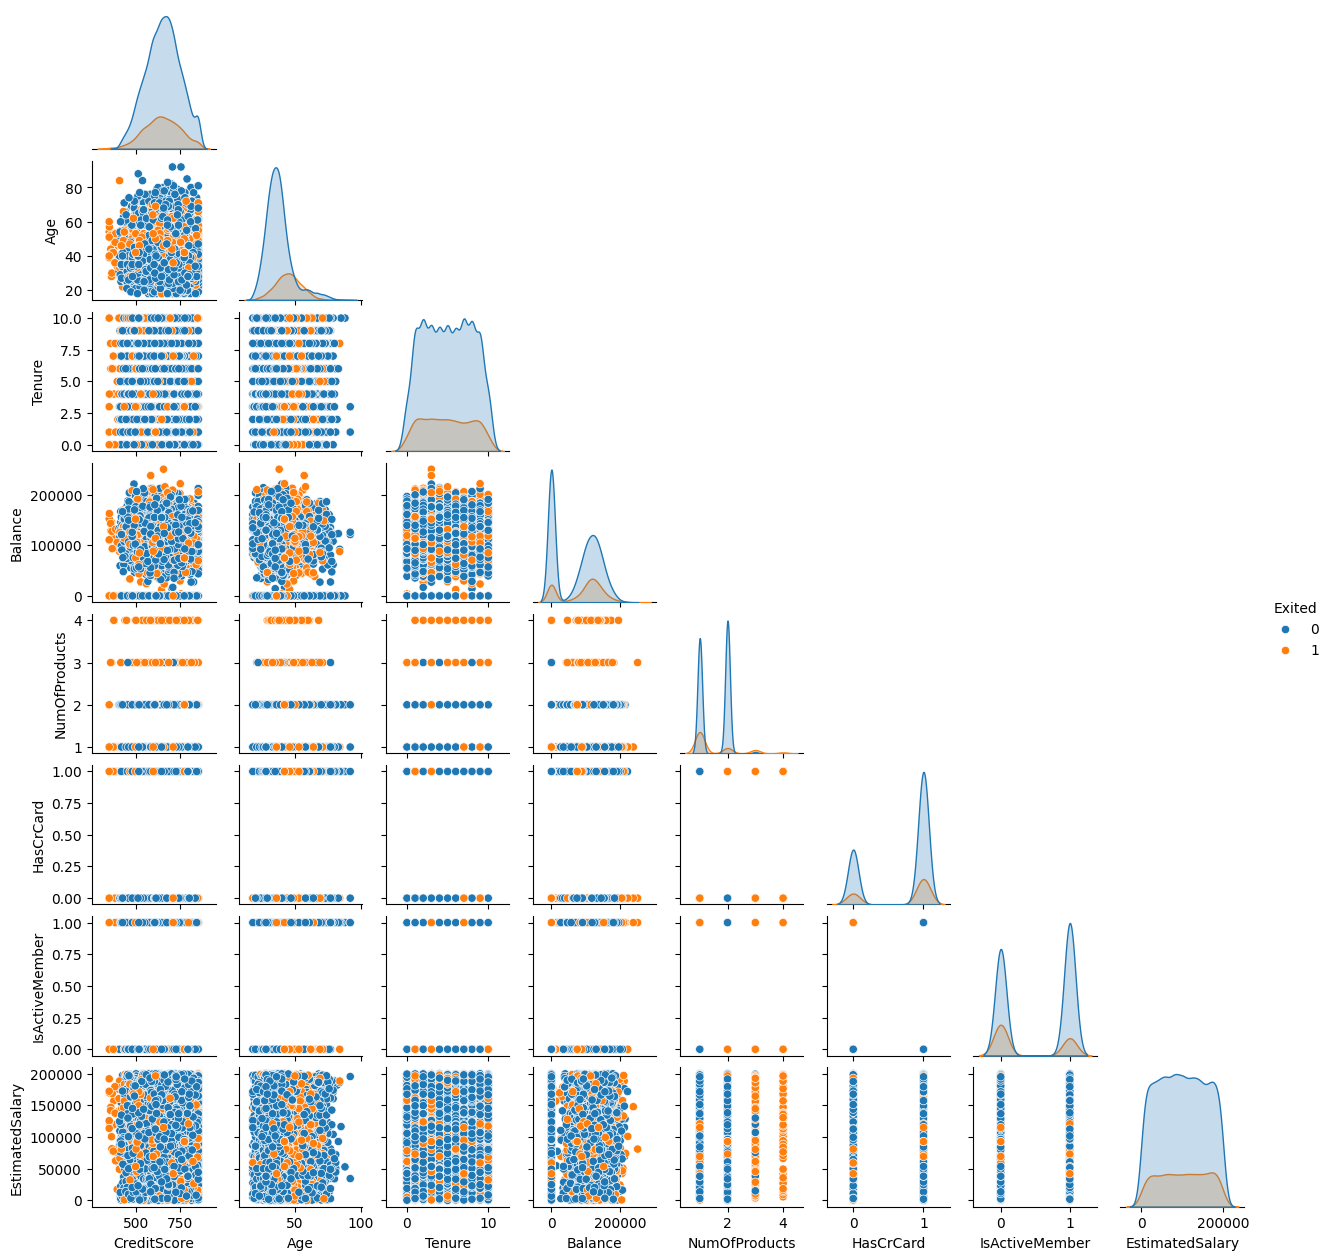

In [66]:
plt.figure(figsize=(10, 30))
sns.pairplot(
data[num_features],
hue='Exited',
kind="scatter",
diag_kind='kde',
height=1.6,
corner = True
);
plt.show()


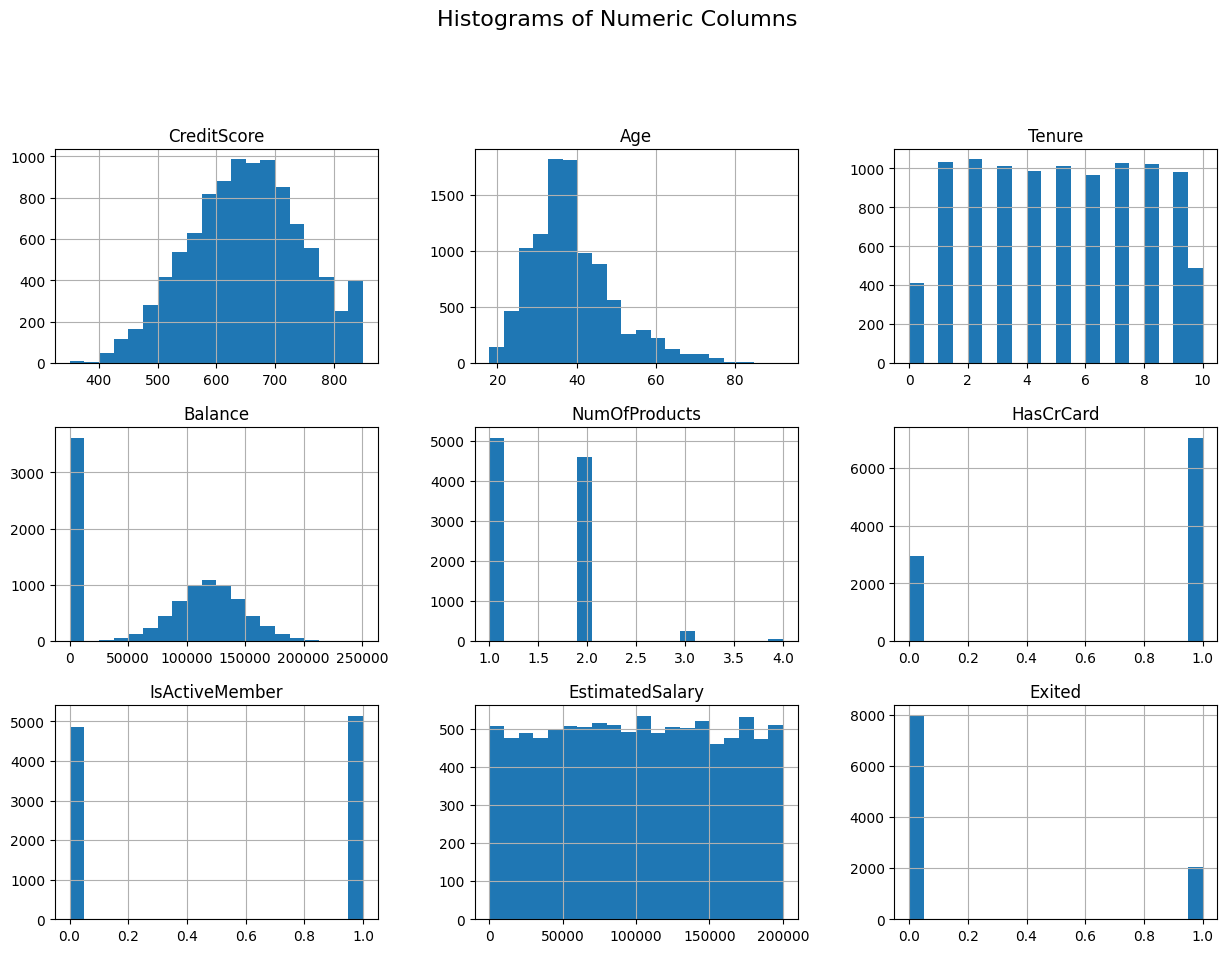

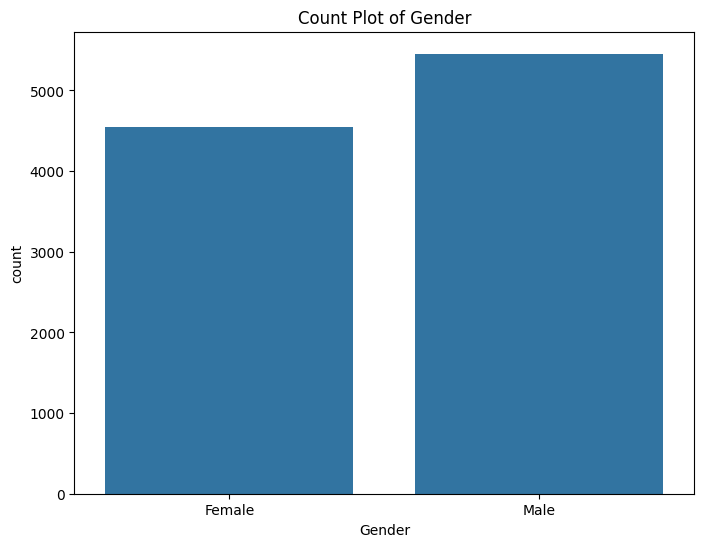

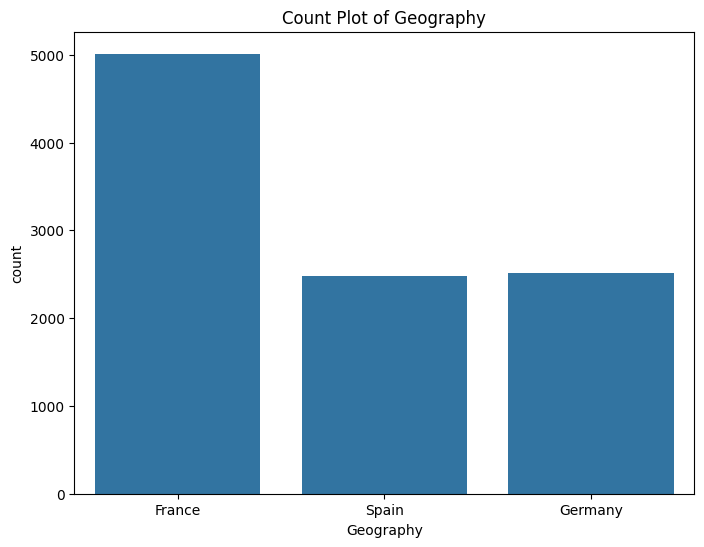

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

data[num_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Columns", y=1.02, fontsize=16)
plt.show()

cat_features = data.columns.difference(num_features)
for cat_col in cat_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=cat_col, data=data)
    plt.title(f"Count Plot of {cat_col}")
    plt.show()



#### Which predictor variables are the most important?



In [44]:
correlation_matrix = data[num_features].corr()
target_correlation = correlation_matrix['Exited'].abs().sort_values(ascending=False)
print("Correlation with target variable:")
print(target_correlation)

Correlation with target variable:
Exited             1.000000
Age                0.285448
IsActiveMember     0.156072
Balance            0.118564
NumOfProducts      0.047621
CreditScore        0.026790
Tenure             0.014208
EstimatedSalary    0.011981
HasCrCard          0.007023
Name: Exited, dtype: float64


#### Which independent variables have missing data? How much?



In [45]:
missing_percentage = (data[num_features].isnull().mean() * 100).sort_values(ascending=False)
print("Columns with missing data and their percentages:")
print(missing_percentage)

Columns with missing data and their percentages:
CreditScore        0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64


In [79]:
# Use z-score or IQR method to identify and remove outliers
from scipy.stats import zscore

z_scores = zscore(data[num_features])
df_no_outliers = data[(z_scores < 3).all(axis=1)]
df_no_outliers.shape


(9805, 11)

#### Do train and test sets have the same data?


In [74]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
# Assuming 'target_variable' is the target variable 'Exited'

# Separate features (X) and target variable (y)
X = data.drop('Exited', axis=1)
y = data['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if training and testing sets have the same data
is_data_same = (X_train.equals(X_test) and y_train.equals(y_test))

# Display the result
print(f"Do training and testing sets have the same data? {is_data_same}")







Do training and testing sets have the same data? False


#### The below confusion matrix shows the imbalance of the target variable

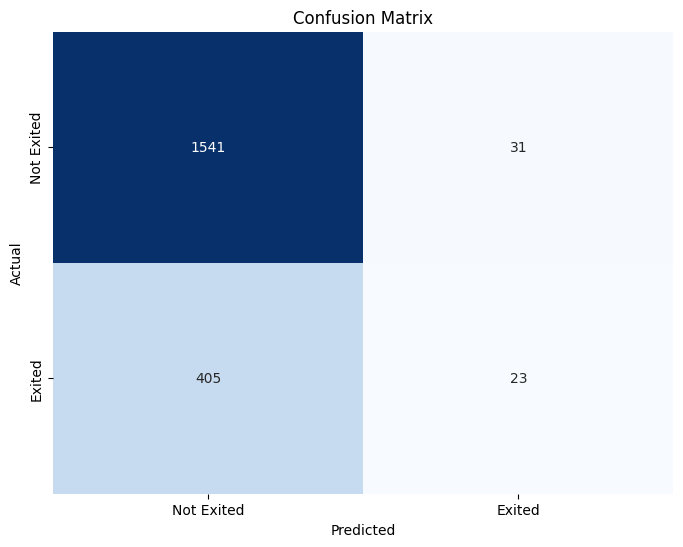

In [64]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
model = LogisticRegression()
X = data[num_features]
y = data['Exited']
model.fit(X, y)

# Get the coefficients and corresponding variable names
coefficients = model.coef_[0]
variable_names = X.columns

# Create a DataFrame to display the coefficients and variable names
coefficients_df = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute values of coefficients to identify the most important variables
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the DataFrame
print(coefficients_df)


          Variable  Coefficient  Absolute Coefficient
1              Age     0.044675              0.044675
8           Exited     0.006972              0.006972
0      CreditScore    -0.005087              0.005087
2           Tenure    -0.001637              0.001637
6   IsActiveMember    -0.001445              0.001445
4    NumOfProducts    -0.000453              0.000453
5        HasCrCard    -0.000190              0.000190
3          Balance     0.000004              0.000004
7  EstimatedSalary    -0.000001              0.000001


In the resulting DataFrame (coefficients_df), the variables with larger absolute coefficients are considered more important. Positive coefficients indicate a positive impact on the log-odds of the target variable being 1, while negative coefficients indicate a negative impact.